<a href="https://colab.research.google.com/github/malavikaparth/Machine_learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

##Exploring Data

In [8]:
# call the data set
df = pd.read_csv('/content/drive/MyDrive/Titanic/titanic.zip (Unzipped Files)/train.csv')
#df_test = pd.read_csv("/content/drive/MyDrive/Titanic/titanic.zip (Unzipped Files)/test.csv")

In [9]:
y = df['Survived']

In [10]:
# To Print the head of the dataset (first ten values)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
null_age_rows = df[df['Age'].isnull()]
print(null_age_rows[['Age', 'Survived']])

     Age  Survived
5    NaN         0
17   NaN         1
19   NaN         1
26   NaN         0
28   NaN         1
..   ...       ...
859  NaN         0
863  NaN         0
868  NaN         0
878  NaN         0
888  NaN         0

[177 rows x 2 columns]


In [12]:
# getting the info of the dataset
print(f'\n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

None


In [13]:
# describing the dataset
print(f'\n{df.describe()}')


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [14]:
print(df.shape)

(891, 12)


In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
print(df.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##Visuvalizing Data

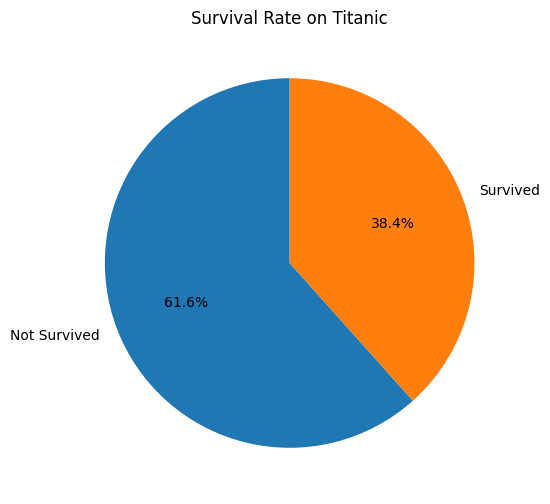

In [18]:
# Calculate survival counts
survival_counts = df['Survived'].value_counts()

# Plotting the survival rate as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate on Titanic')
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Pclass
1    216
2    184
3    491
dtype: int64


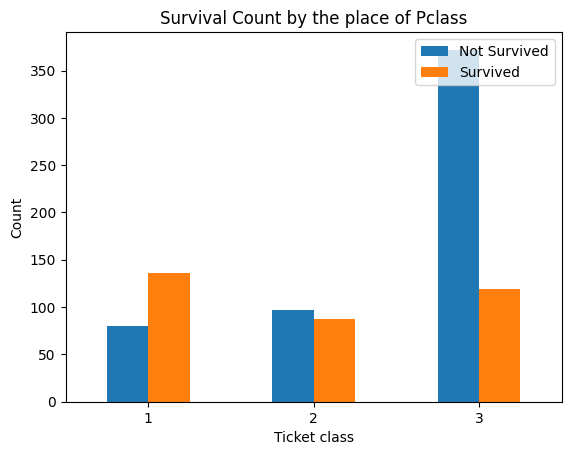

In [19]:
# Grouping data by Sex and Survived columns and calculating the counts
Pclass_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
print(Pclass_survival_counts)
print(df.groupby('Pclass').size())
Pclass_survival_counts.plot(kind='bar')
plt.title('Survival Count by the place of Pclass')
plt.xlabel('Ticket class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # to keep the x-axis labels horizontal
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

Survived    0    1
Sex               
female     81  233
male      468  109


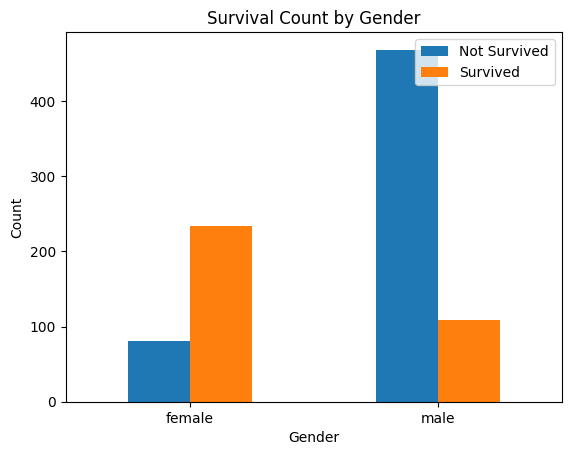

In [20]:
# Grouping data by Sex and Survived columns and calculating the counts
sex_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
print(sex_survival_counts)
# Plotting the counts
sex_survival_counts.plot(kind='bar')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # to keep the x-axis labels horizontal
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
Embarked
C    168
Q     77
S    644
dtype: int64


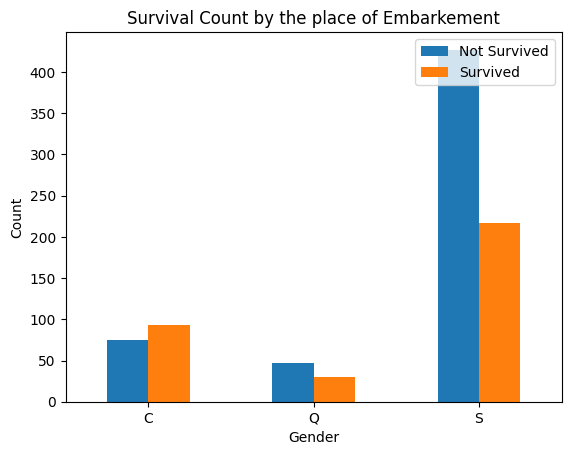

In [21]:
# Grouping data by Embarkement and Survived columns and calculating the counts
embarked_survival_counts = df.groupby(['Embarked', 'Survived']).size().unstack()
print(embarked_survival_counts)
print(df.groupby('Embarked').size())
embarked_survival_counts.plot(kind='bar')
plt.title('Survival Count by the place of Embarkement')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # to keep the x-axis labels horizontal
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

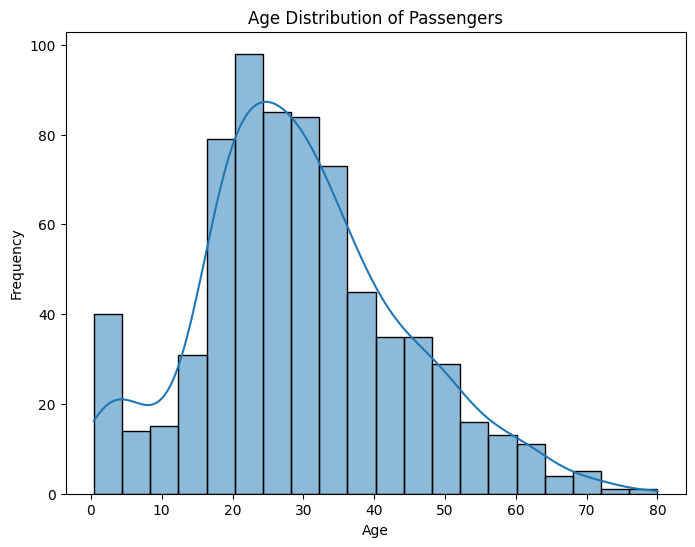

In [22]:
# Removing null values in the 'Age' column
age_data = df['Age'].dropna()

# Plotting age distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(age_data, bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


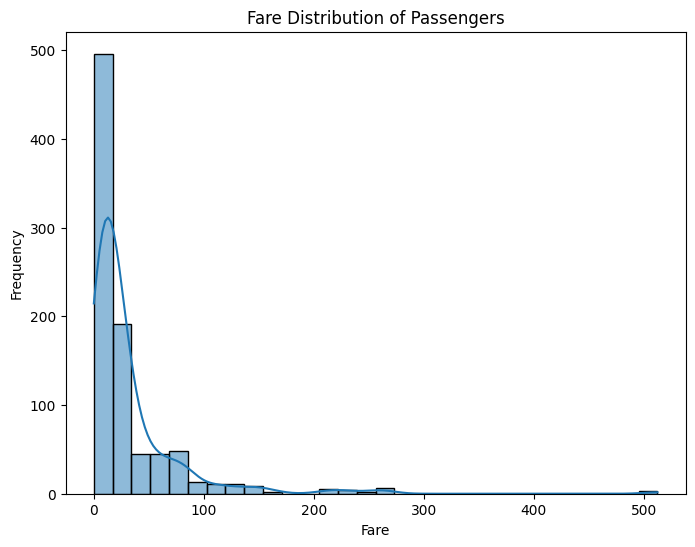

In [23]:
# Plotting fare distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64


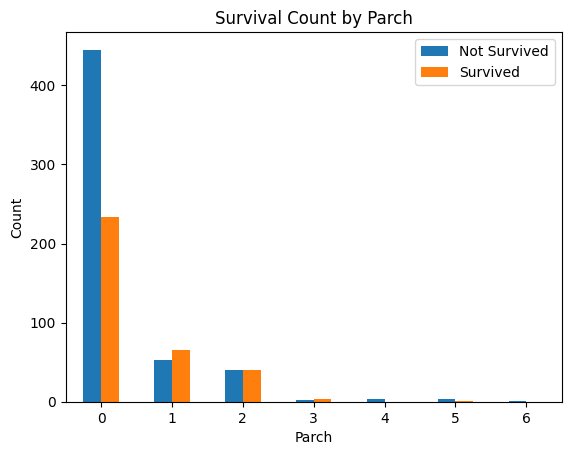

In [24]:
# Grouping data by Parch and Survived columns and calculating the counts
parch_survival_counts = df.groupby(['Parch', 'Survived']).size().unstack()
print(parch_survival_counts)
print(df.groupby('Parch').size())
parch_survival_counts.plot(kind='bar')
plt.title('Survival Count by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.xticks(rotation=0)  # to keep the x-axis labels horizontal
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

Survived      0      1
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64


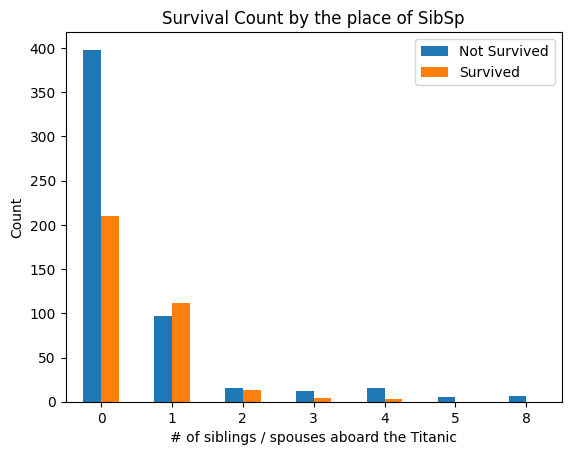

In [25]:
# Grouping data by SibSp and Survived columns and calculating the counts
SibSp_survival_counts = df.groupby(['SibSp', 'Survived']).size().unstack()
print(SibSp_survival_counts)
print(df.groupby('SibSp').size())
SibSp_survival_counts.plot(kind='bar')
plt.title('Survival Count by the place of SibSp')
plt.xlabel('# of siblings / spouses aboard the Titanic')
plt.ylabel('Count')
plt.xticks(rotation=0)  # to keep the x-axis labels horizontal
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

<ipython-input-26-b93117df0298>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


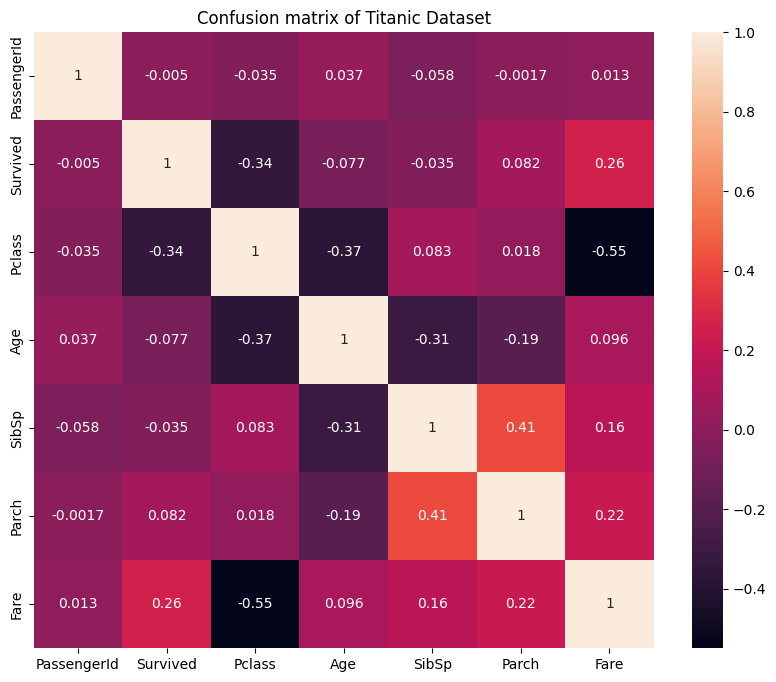

In [26]:
# To check correlation map
cor = df.corr()

# Plotting correlation map
plt.figure(figsize=(10,8))
plt.title('Confusion matrix of Titanic Dataset')
sns.heatmap(cor, annot = True)
plt.show()

--  ------       --------------  -----  
 0   PassengerId  No \\
 2   Pclass       Yes \\
 3   Name         No \\
 4   Sex          Yes \\
 5   Age          Yes \\
 6   SibSp        Yes \\
 7   Parch        Yes \\
 8   Ticket       No \\
 9   Fare         Yes \\
 10  Cabin        no \\
 11  Embarked     Yes

## Processing the model

In [27]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [28]:
X_pred, X_train, y_pred, y_train = train_test_split(df, y, test_size=0.28, random_state=101)

In [29]:
X_train  = X_train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X_pred = X_pred.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

#y_test = df_test['Survived']

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 331 to 24
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  250 non-null    int64  
 1   Pclass       250 non-null    int64  
 2   Sex          250 non-null    int64  
 3   Age          196 non-null    float64
 4   SibSp        250 non-null    int64  
 5   Parch        250 non-null    int64  
 6   Fare         250 non-null    float64
 7   Embarked     250 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 17.6 KB


In [30]:
sex_mapping = {'male': 0, 'female': 1}

# Apply the mapping to the 'Sex' column
X_train['Sex'] = X_train['Sex'].map(sex_mapping)
X_pred['Sex'] = X_pred['Sex'].map(sex_mapping)

In [31]:
embarked_mapping = {'C': 1, 'Q': 2, 'S' : 3}

# Apply the mapping to the 'Sex' column
X_train['Embarked'] = X_train['Embarked'].map(embarked_mapping)
X_pred['Embarked'] = X_pred['Embarked'].map(embarked_mapping)

In [38]:
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_pred = pd.DataFrame(my_imputer.fit_transform(X_pred))

In [39]:
# Initialising the model
rf = RandomForestClassifier(n_estimators=200)

# fitting the model
rf.fit(imputed_X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [40]:
# To print the predcitions of the Random Forest Model
predicti = rf.predict(imputed_X_train)
# To print the classification report and confusion matrix for the Random Forest
print('Report for Random Forest Model')
print('\n')
# To print the confusion matrix
print('The confusion matrix is: ' + '\n \n',confusion_matrix(y_train,predicti))

print('\n')

# To print the classification report
print('The classification report is: ' + '\n \n',classification_report(y_train,predicti))
print(accuracy_score(y_train,predicti)*100)

Report for Random Forest Model


The confusion matrix is: 
 
 [[144   0]
 [  0 106]]


The classification report is: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       106

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

100.0


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid to search through
param_grid = {
    'n_estimators': range(100, 510, 10),
    # Add other hyperparameters and their ranges if needed
}

# Create a Random Forest classifier instance
rf = RandomForestClassifier()

# Initialize GridSearchCV with the defined parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(imputed_X_train, y_train)

# Get the best estimator and its parameters
best_estimator = grid_search.best_estimator_
best_parameters = grid_search.best_params_

# Print the best parameters found
print("Best Parameters:", best_parameters)



Best Parameters: {'n_estimators': 170}
